<a href="https://colab.research.google.com/github/Udaybabubojja/machine-learning/blob/main/barcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install opencv-python
!apt install libzbar0



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-

In [9]:
pip install pyzbar

Barcode Type:  EAN13
Barcode Data:  8901491363020


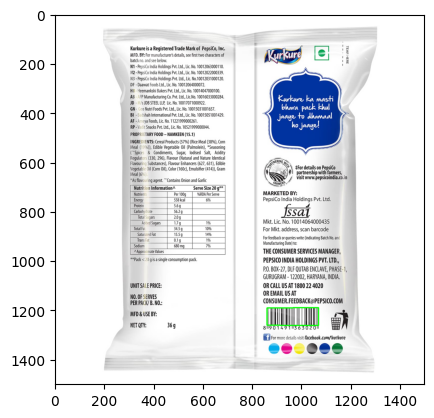

In [18]:
from pyzbar.pyzbar import decode
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Import the matplotlib library

# Load the image
img_path = "/content/kurkute.jpg"
image = cv2.imread(img_path)

# Decode barcodes from the image
barcodes = decode(image)

# Iterate through the detected barcodes
for barcode in barcodes:
    barcode_data = barcode.data.decode("utf-8")
    barcode_type = barcode.type
    print("Barcode Type: ", barcode_type)
    print("Barcode Data: ", barcode_data)

    # Draw a rectangle around the barcode
    points = barcode.polygon
    if len(points) > 4:
        hull = cv2.convexHull(np.array([point for point in points]))
        cv2.polylines(image, [hull], True, (0, 255, 0), 3)
    else:
        cv2.polylines(image, [points], True, (0, 255, 0), 3)

# Display the image with barcode detection using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [20]:
pip install requests


In [1]:
import requests

def get_product_details(barcode_data):
    api_url = f"https://world.openfoodfacts.org/api/v0/product/{barcode_data}.json"

    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        product = data.get("product", {})
        product_name = product.get("product_name", "Product Name Not Available")
        return product_name
    else:
        return "Product details not found"

# Replace "barcode_data" with your actual barcode data
barcode_data = "8901491363020"
product_name = get_product_details(barcode_data)
print(f"Product Name: {product_name}")


Product Name: Chilli Chatka
